# **Minimum Spanning Tree**


Minimum spanning tree is a subset of a graph, where every vertex is connected to at least one other vertex, but at most connected to two other vertices, that indicates no cycle, and the total weight of the graph is the minimum possible. Lol, long definition!

# **Prim's Algorithm**


Prim's algorithm is perfect for a minimum spanning tree problem. The algorithm is somewhat similar to BFS. We start from one vertex and check its child vertices. In BFS, we pop vertices by left to right order. In Prim, we only pop the vertex with minimum weight and ignore the rest. When all available vertices have been popped, we obtain a minimum spanning tree.

Details of Prim's algorithm can be found in the following link

http://interactivepython.org/runestone/static/pythonds/Graphs/PrimsSpanningTreeAlgorithm.html

In [3]:
def prim_mst(graph):
    mst = set()  # Set to store the MST
    visited = set()  # Set to track visited nodes
    current_node = next(iter(graph))  # Choose an arbitrary starting node
    visited.add(current_node)

    while len(mst) < len(graph) - 1:
        # Find the minimum weight edge connecting a visited node to an unvisited node
        min_weight_edge = (None, None, float("inf"))  # (Node, Neighbor, Weight)
        for node in visited:
            for neighbor, weight in graph[node].items():
                if neighbor not in visited and weight < min_weight_edge[2]:
                    min_weight_edge = (node, neighbor, weight)

        # Add the minimum weight edge to the MST and mark the neighbor as visited
        mst.add((min_weight_edge[0], min_weight_edge[1]))
        visited.add(min_weight_edge[1])

    return mst

# Example graph
graph = {
    0: {1: 4, 2: 3},
    1: {0: 4, 2: 1, 3: 2},
    2: {0: 3, 1: 1, 3: 4, 4: 5},
    3: {1: 2, 2: 4, 4: 2},
    4: {2: 5, 3: 2}
}

mst = prim_mst(graph)
print(mst)


{(0, 2), (1, 3), (2, 1), (3, 4)}


In [ ]:
import graphviz

mst = {(0, 2), (1, 3), (2, 4), (3, 4)}
graph = graphviz.Graph()

for node in graph:
    graph.node(str(node))

for edge in mst:
    graph.edge(str(edge[0]), str(edge[1]))

graph.render('mst.png')

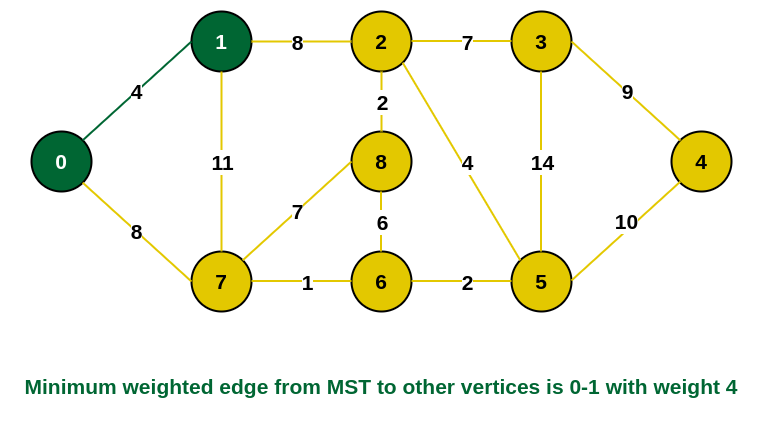

# **Kruskal's Algorithm**


Kruskal is another algorithm to get minimum spanning tree. Unlike Prim, Kruskal cannot select where to expand the tree. Kruskal requires all edges in the graph ADT to be sorted. Those edges are stored inside a queue by ascending order. The algorithm iterates through the queue and picks out the edge with the smallest weight, as long as the edge doesn't create a cycle in the subset, the edge will be added into the subset. When the iteration stops, a minimum spanning tree is born.

In [2]:
class Graph:
    def __init__(self, vertices):
        self.V = vertices
        self.graph = []

    def add_edge(self, u, v, w):
        self.graph.append([u, v, w])

    def kruskal_mst(self):
        result = []  # Store the MST
        self.graph = sorted(self.graph, key=lambda item: item[2])
        parent = [i for i in range(self.V)]
        num_edges = 0
        i = 0

        while num_edges < self.V - 1:
            u, v, w = self.graph[i]
            i += 1
            x = self.find(parent, u)
            y = self.find(parent, v)

            if x != y:
                result.append([u, v, w])
                self.union(parent, x, y)
                num_edges += 1

        return result

    def find(self, parent, i):
        if parent[i] == i:
            return i
        return self.find(parent, parent[i])

    def union(self, parent, x, y):
        x_set = self.find(parent, x)
        y_set = self.find(parent, y)
        parent[x_set] = y_set
g = Graph(5)
g.add_edge(0, 1, 2)
g.add_edge(0, 3, 6)
g.add_edge(1, 2, 3)
g.add_edge(1, 3, 8)
g.add_edge(1, 4, 5)
g.add_edge(2, 4, 7)
g.add_edge(3, 4, 9)
mst = g.kruskal_mst()
print("Edges in MST:")
for u, v, w in mst:
    print(f"{u} - {v} (Weight: {w})")


Edges in MST:
0 - 1 (Weight: 2)
1 - 2 (Weight: 3)
1 - 4 (Weight: 5)
0 - 3 (Weight: 6)


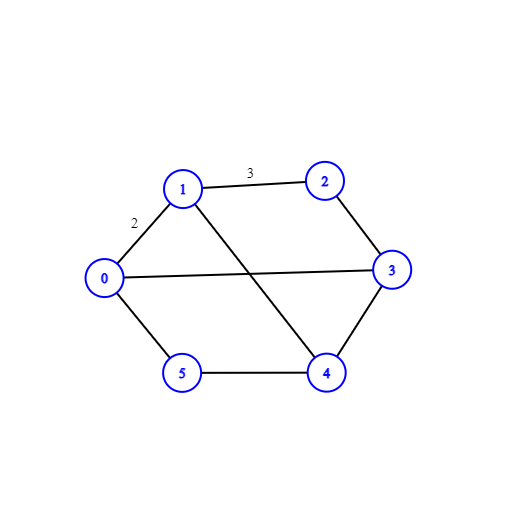